In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("krkopt.data", header=None)
data.columns = ["wkc", "wkr", "wrc", "wrr", "bkc", "bkr", "opt rank" ]


In [3]:
data

wkc  wkr wrc  wrr bkc  bkr opt rank
0       a    1   b    3   c    2     draw
1       a    1   c    1   c    2     draw
2       a    1   c    1   d    1     draw
3       a    1   c    1   d    2     draw
4       a    1   c    2   c    1     draw
...    ..  ...  ..  ...  ..  ...      ...
28051   b    1   g    7   e    5  sixteen
28052   b    1   g    7   e    6  sixteen
28053   b    1   g    7   e    7  sixteen
28054   b    1   g    7   f    5  sixteen
28055   b    1   g    7   g    5  sixteen

[28056 rows x 7 columns]

<AxesSubplot:xlabel='opt rank', ylabel='count'>

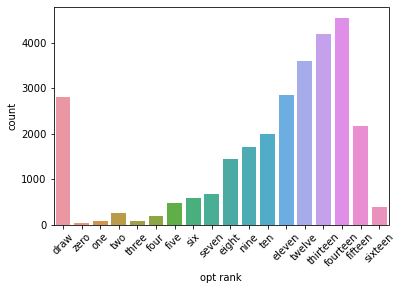

In [8]:
plt.xticks(rotation=45)
sns.countplot(x='opt rank',
             data=data)

In [195]:
from collections import Counter
counter = Counter(data['opt rank'])
for k,v in counter.items():
	per = v / len(data['opt rank']) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))

Class=draw, n=2796 (9.966%)
Class=zero, n=27 (0.096%)
Class=one, n=78 (0.278%)
Class=two, n=246 (0.877%)
Class=three, n=81 (0.289%)
Class=four, n=198 (0.706%)
Class=five, n=471 (1.679%)
Class=six, n=592 (2.110%)
Class=seven, n=683 (2.434%)
Class=eight, n=1433 (5.108%)
Class=nine, n=1712 (6.102%)
Class=ten, n=1985 (7.075%)
Class=eleven, n=2854 (10.173%)
Class=twelve, n=3597 (12.821%)
Class=thirteen, n=4194 (14.949%)
Class=fourteen, n=4553 (16.228%)
Class=fifteen, n=2166 (7.720%)
Class=sixteen, n=390 (1.390%)


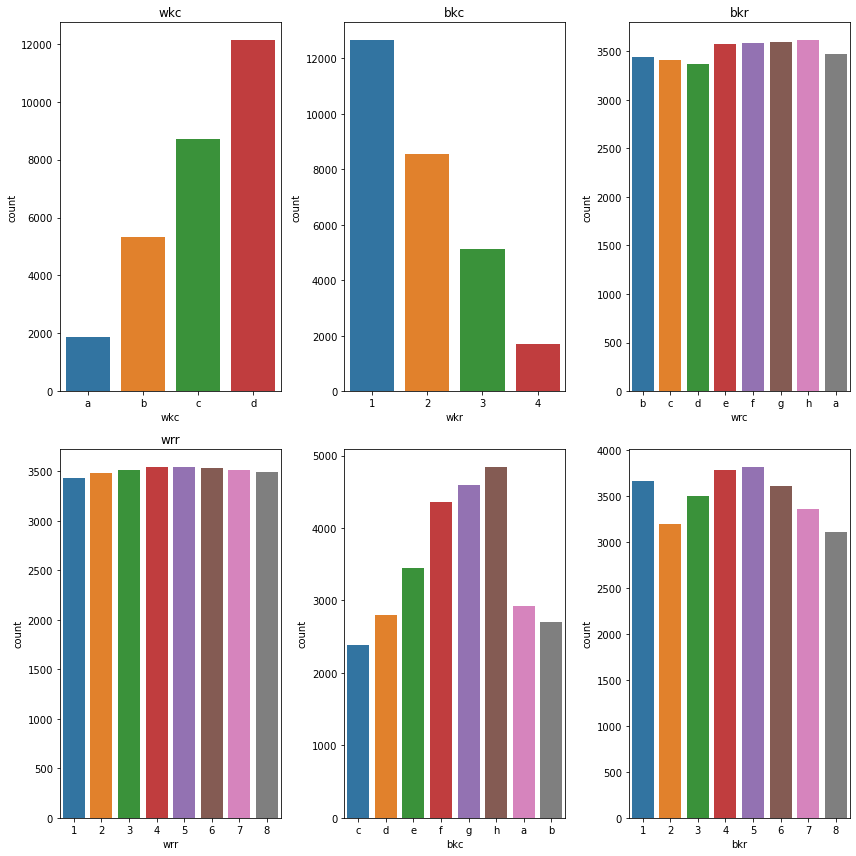

In [178]:
f, ax = plt.subplots(2,3, figsize=(12,12) )
sns.countplot(ax= ax[0,0], x='wkc',
             data=data)
sns.countplot(ax= ax[0,1], x='wkr',
             data=data)
sns.countplot(ax= ax[0,2], x='wrc',
             data=data)
sns.countplot(ax= ax[1,0], x='wrr',
             data=data)
sns.countplot(ax= ax[1,1], x='bkc',
             data=data)
sns.countplot(ax= ax[1,2], x='bkr',
             data=data)


ax[0,0].set_title("wkc")
ax[0,1].set_title("wkr")
ax[0,2].set_title("wrc")
ax[1,0].set_title("wrr")
ax[0,1].set_title("bkc")
ax[0,2].set_title("bkr")

plt.tight_layout()
plt.savefig('foo.pdf', transparent=True)

In [53]:
data_aux = data.copy()

In [67]:
data_aux[['wkc', 'wrc', 'bkc']] = data_aux[['wkc', 'wrc', 'bkc']].astype('category')

data_aux['wkc'] = data_aux['wkc'].cat.codes
data_aux['wrc'] = data_aux['wrc'].cat.codes
data_aux['bkc'] = data_aux['bkc'].cat.codes


In [68]:
data_aux.dtypes

wkc           int8
wkr          int64
wrc           int8
wrr          int64
bkc           int8
bkr          int64
opt rank    object
dtype: object

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_aux.drop("opt rank", axis=1), data_aux['opt rank']
                                                    ,test_size=0.2)

In [70]:
feature_names = [f'feature {i}' for i in range(data_aux.drop('opt rank', axis=1).shape[1])]

In [71]:
feature_names

['feature 0', 'feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5']

In [72]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [73]:
importances = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)

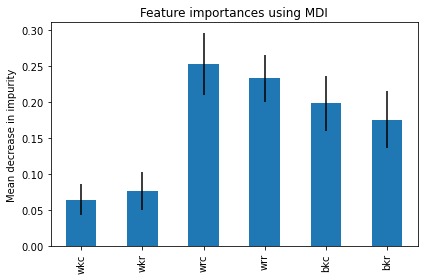

In [99]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
ax.set_xticks([0,1,2,3,4,5]) # values
labels = list(data_aux.columns[:-1])
ax.set_xticklabels(labels) # labels
positions = (1, 2, 3,4, 5)


fig.tight_layout()